In [13]:
import tellurium as te
import teUtils




In [14]:
r = te.loada("""
      $S1 -> S2; k1*S1
      S2 -> ; Vm2*S2/(Km + S2)
#Here the S2 concentration goes to infinity by increasing the time and did not 
#reach SS at any points, therefore there is two ways to fix this, because K1S1 is equal to 1
#and Vm2 for second reaction is 0.5 it can not go over 1, therefore one way is   
#is to increase Vm2 to 1.5, or you can remove the $ sign and then both
#concentration goes to zero finally which is an uninteresting model

      k1 = 0.1
      S1 = 10
      Vm2 = 0.5; Km = 0.5
""")


In [15]:
r.simulate(0,100,100)

       time,     [S2]
 [[       0,        0],
  [  1.0101, 0.798536],
  [  2.0202,  1.46022],
  [  3.0303,  2.07715],
  [  4.0404,  2.67034],
  [ 5.05051,  3.24855],
  [ 6.06061,  3.81631],
  [ 7.07071,  4.37637],
  [ 8.08081,  4.93046],
  [ 9.09091,  5.47981],
  [  10.101,  6.02527],
  [ 11.1111,   6.5675],
  [ 12.1212,  7.10698],
  [ 13.1313,  7.64411],
  [ 14.1414,  8.17919],
  [ 15.1515,  8.71247],
  [ 16.1616,  9.24417],
  [ 17.1717,  9.77446],
  [ 18.1818,  10.3035],
  [ 19.1919,  10.8313],
  [  20.202,  11.3582],
  [ 21.2121,  11.8841],
  [ 22.2222,  12.4091],
  [ 23.2323,  12.9333],
  [ 24.2424,  13.4568],
  [ 25.2525,  13.9796],
  [ 26.2626,  14.5018],
  [ 27.2727,  15.0234],
  [ 28.2828,  15.5444],
  [ 29.2929,   16.065],
  [  30.303,   16.585],
  [ 31.3131,  17.1046],
  [ 32.3232,  17.6238],
  [ 33.3333,  18.1426],
  [ 34.3434,   18.661],
  [ 35.3535,  19.1791],
  [ 36.3636,  19.6968],
  [ 37.3737,  20.2142],
  [ 38.3838,  20.7313],
  [ 39.3939,  21.2481],
  [  40.404,  21.7

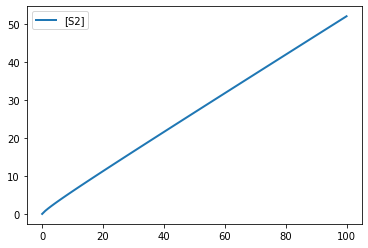

In [16]:
r.plot()

In [17]:
m = te.loada("""
      $S1 -> S2; k1*S1
      #in the original model, S2 after K2 was missing and therefore the S2
      #concentration goes to infinity, so we fixed it by multiplying K2
      #to S2 concentration
      S2 -> S3;  k2*S2
      S3 -> S4;  k3*S3
      S4 -> ;    k4*S4
      
      k1 = 0.1; k2 = 0.2; k3 = 0.5; k4 = 1.3
      S1 = 10
""")



In [18]:
m.simulate(0, 20, 100)

        time,     [S2],       [S3],        [S4]
 [[        0,        0,          0,           0],
  [  0.20202, 0.197993, 0.00389414, 0.000124336],
  [  0.40404, 0.388147,  0.0148689, 0.000901767],
  [ 0.606061,  0.57077,  0.0319488,  0.00276441],
  [ 0.808081, 0.746162,  0.0542639,   0.0059629],
  [   1.0101, 0.914608,  0.0810387,   0.0106171],
  [  1.21212,  1.07638,   0.111583,   0.0167545],
  [  1.41414,  1.23175,   0.145285,   0.0243383],
  [  1.61616,  1.38097,   0.181598,   0.0332893],
  [  1.81818,  1.52428,   0.220041,   0.0435007],
  [   2.0202,  1.66191,   0.260186,   0.0548506],
  [  2.22222,   1.7941,   0.301656,   0.0672093],
  [  2.42424,  1.92105,   0.344119,   0.0804459],
  [  2.62626,  2.04297,   0.387282,   0.0944318],
  [  2.82828,  2.16006,   0.430889,    0.109044],
  [   3.0303,  2.27252,   0.474715,    0.124167],
  [  3.23232,  2.38053,   0.518564,    0.139693],
  [  3.43434,  2.48425,   0.562267,    0.155522],
  [  3.63636,  2.58387,   0.605677,    0.171565],
  

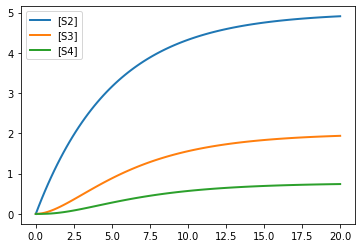

In [19]:
m.plot()

In [26]:
rr = te.loada("""
      $S1 -> S2; k1*S1
      S2 -> S3;  k2*S2
      #in original model instead of S3 next to K3 it was written S1
      #and the S3 concentration went to negative values
      S3 -> S4;  k3*S3
      S4 -> ;    k4*S4
      
      k1 = 0.1; k2 = 0.2; k3 = 0.5; k4 = 1.3
      S1 = 10
""")

# print ('Distance from steady state = ', rr.steadyState())

#there should not be any Nan or inf value in these two commands
print(rr.getRatesOfChange())
print(rr.getReactionRates())
help(rr)
# print(rr.__dir__())

[1. 0. 0.]
[1. 0. 0. 0.]
Help on ExtendedRoadRunner in module tellurium.roadrunner.extended_roadrunner object:

class ExtendedRoadRunner(roadrunner.roadrunner.RoadRunner)
 |  RoadRunner.__init__(uriOrSBML = , options = None)
 |  
 |  Creates a new RoadRunner object. If the first argument is specified,
 |  it should be a string containing either the contents of an SBML document,
 |  or a formatted URI specifying the path or location of a SBML document.
 |  
 |  If options is given, it should be a LoadSBMLOptions object.
 |  
 |  If no arguments are given, a document may be loaded at any future time
 |  using the load method.
 |  
 |  :param uriOrSBML: a URI, local path or SBML document contents.
 |  :type name: str (optional)
 |  
 |  :param options: (LoadSBMLOptions) an options object specifying how the
 |                  SBML document should be loaded
 |  :type name: str (optional)
 |  
 |  Method resolution order:
 |      ExtendedRoadRunner
 |      roadrunner.roadrunner.RoadRunner
 

In [3]:
rr.simulate(0, 20, 100)



NameError: name 'rr' is not defined

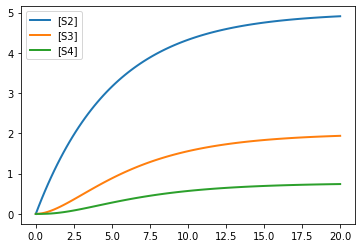

0.0

In [153]:
rr.plot()
rr.steadyState()